In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)

In [2]:
# Data frame initialisation
df1 = pd.read_csv("house_offers.csv")
df1.head()

,id,location_big,location,seller_type,type,partitioning,comfort,price,rooms_count,useful_surface,...,construction_year,real_estate_type,height_regime,level,max_level,kitchens_count,bathrooms_count,garages_count,parking_lots_count,balconies_count
0,101,"Bucuresti, Sector 6, zona Drumul Taberei",Drumul Taberei,agency,apartament,decomandat,lux,37400,2.0,65.0,...,2018.0,bloc de apartamente,S+P+6E,2,6.0,1.0,1.0,NaN,1.0,1.0
1,102,"Bucuresti, Sector 6, zona Drumul Taberei",Drumul Taberei,agency,apartament,semidecomandat,1,39900,2.0,65.0,...,2018.0,bloc de apartamente,P+6E,1,6.0,1.0,1.0,NaN,1.0,1.0
2,103,"Bucuresti, Sector 3, zona Dristor",Dristor,agency,apartament,decomandat,lux,90290,2.0,58.0,...,2020.0,bloc de apartamente,D+P+5E,4,5.0,1.0,1.0,1.0,1.0,1.0
3,104,"Bucuresti, zona Herastrau",Herastrau,agency,apartament,decomandat,lux,700000,5.0,233.0,...,2021.0,bloc de apartamente,D+P+5E,5,5.0,1.0,3.0,NaN,NaN,NaN
4,105,"Bucuresti, Sector 6, zona Militari",Militari,agency,apartament,decomandat,1,48000,2.0,42.0,...,2021.0,bloc de apartamente,D+P+10E,2,10.0,1.0,1.0,NaN,NaN,1.0


In [3]:
df2 = df1.drop(['id', 'location_big', 'seller_type', 'type', 'partitioning', 'comfort', 'height_regime', 'useful_surface', 'construction_year', 'real_estate_type',
               'kitchens_count', 'garages_count', 'parking_lots_count'], axis='columns')
df2['price'] = df2['price'] + df2['price'] * 0.45
df2.head()

,location,price,rooms_count,built_surface,level,max_level,bathrooms_count,balconies_count
0,Drumul Taberei,54230.0,2.0,65.0,2,6.0,1.0,1.0
1,Drumul Taberei,57855.0,2.0,79.0,1,6.0,1.0,1.0
2,Dristor,130920.5,2.0,68.0,4,5.0,1.0,1.0
3,Herastrau,1015000.0,5.0,270.0,5,5.0,3.0,NaN
4,Militari,69600.0,2.0,53.0,2,10.0,1.0,1.0


In [4]:
df3 = df2.copy()
df3['price_per_m2'] = df3['price']/df3['built_surface']
df3.head()

,location,price,rooms_count,built_surface,level,max_level,bathrooms_count,balconies_count,price_per_m2
0,Drumul Taberei,54230.0,2.0,65.0,2,6.0,1.0,1.0,834.307692
1,Drumul Taberei,57855.0,2.0,79.0,1,6.0,1.0,1.0,732.341772
2,Dristor,130920.5,2.0,68.0,4,5.0,1.0,1.0,1925.301471
3,Herastrau,1015000.0,5.0,270.0,5,5.0,3.0,NaN,3759.259259
4,Militari,69600.0,2.0,53.0,2,10.0,1.0,1.0,1313.207547


In [5]:
df3.location = df3.location.apply(lambda x: x.strip())
location_stats = df3.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_stats

location
Berceni            407
Militari           369
Herastrau          354
Pipera             343
Drumul Taberei     307
                  ... 
Centrul Istoric      1
Macaralei            1
Serban Voda          1
Socului              1
Zetarilor            1
Name: location, Length: 187, dtype: int64

In [6]:
location_stats_less_10 = location_stats[location_stats<=10]
location_stats_less_10

location
Salaj              10
Alexandriei        10
Liviu Rebreanu     10
Valea Oltului      10
Regie               9
                   ..
Centrul Istoric     1
Macaralei           1
Serban Voda         1
Socului             1
Zetarilor           1
Name: location, Length: 78, dtype: int64

In [7]:
df3.location = df3.location.apply(lambda x: 'Other' if x in location_stats_less_10 else x)
df3.head(1123)

,location,price,rooms_count,built_surface,level,max_level,bathrooms_count,balconies_count,price_per_m2
0,Drumul Taberei,54230.0,2.0,65.0,2,6.0,1.0,1.0,834.307692
1,Drumul Taberei,57855.0,2.0,79.0,1,6.0,1.0,1.0,732.341772
2,Dristor,130920.5,2.0,68.0,4,5.0,1.0,1.0,1925.301471
3,Herastrau,1015000.0,5.0,270.0,5,5.0,3.0,NaN,3759.259259
4,Militari,69600.0,2.0,53.0,2,10.0,1.0,1.0,1313.207547
...,...,...,...,...,...,...,...,...,...
1118,Vitan-Barzesti,92359.2,2.0,62.0,2,5.0,1.0,1.0,1489.664516
1119,Titan,117450.0,2.0,54.0,9,10.0,1.0,1.0,2175.000000
1120,Parcul Carol,239250.0,3.0,120.0,4,5.0,2.0,1.0,1993.750000
1121,Other,172550.0,1.0,56.0,2,5.0,1.0,1.0,3081.250000


In [8]:
df3.price_per_m2.describe()

count     7399.000000
mean      1998.763853
std       1342.050288
min         78.378378
25%       1381.786116
50%       1769.000000
75%       2304.708558
max      65250.000000
Name: price_per_m2, dtype: float64

In [9]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_m2)
        st = np.std(subdf.price_per_m2)
        reduced_df = subdf[(subdf.price_per_m2 > (m-st)) & (subdf.price_per_m2 <= (m+st))]
        df_out = pd.concat([df_out, reduced_df], ignore_index=True)
    return df_out

df4 = remove_pps_outliers(df3)
df4.shape

(5531, 9)

In [10]:
def plot_scatter_per_m2(df, location):
    ap2 = df[(df.location==location) & (df.rooms_count==2)]
    ap3 = df[(df.location==location) & (df.rooms_count==3)]
    matplotlib.rcParams['figure.figsize'] = (15, 10)
    plt.scatter(ap2.built_surface, ap2.price_per_m2, color='blue', label='2 rooms', s=50)
    plt.scatter(ap3.built_surface, ap3.price_per_m2, color='green', label='3 rooms', s=50)  
    plt.xlabel("Total Square Meter Area")
    plt.ylabel("Price Per Square Meter")
    plt.title(location)
    plt.legend()

def plot_scatter_per_price(df, location):
    ap2 = df[(df.location==location) & (df.rooms_count==2)]
    ap3 = df[(df.location==location) & (df.rooms_count==3)]
    matplotlib.rcParams['figure.figsize'] = (15, 10)
    plt.scatter(ap2.built_surface, ap2.price, color='blue', label='2 rooms', s=50)
    plt.scatter(ap3.built_surface, ap3.price, color='green', label='3 rooms', s=50)  
    plt.xlabel("Total Square Meter Area")
    plt.ylabel("Price")
    plt.title(location)
    plt.legend()

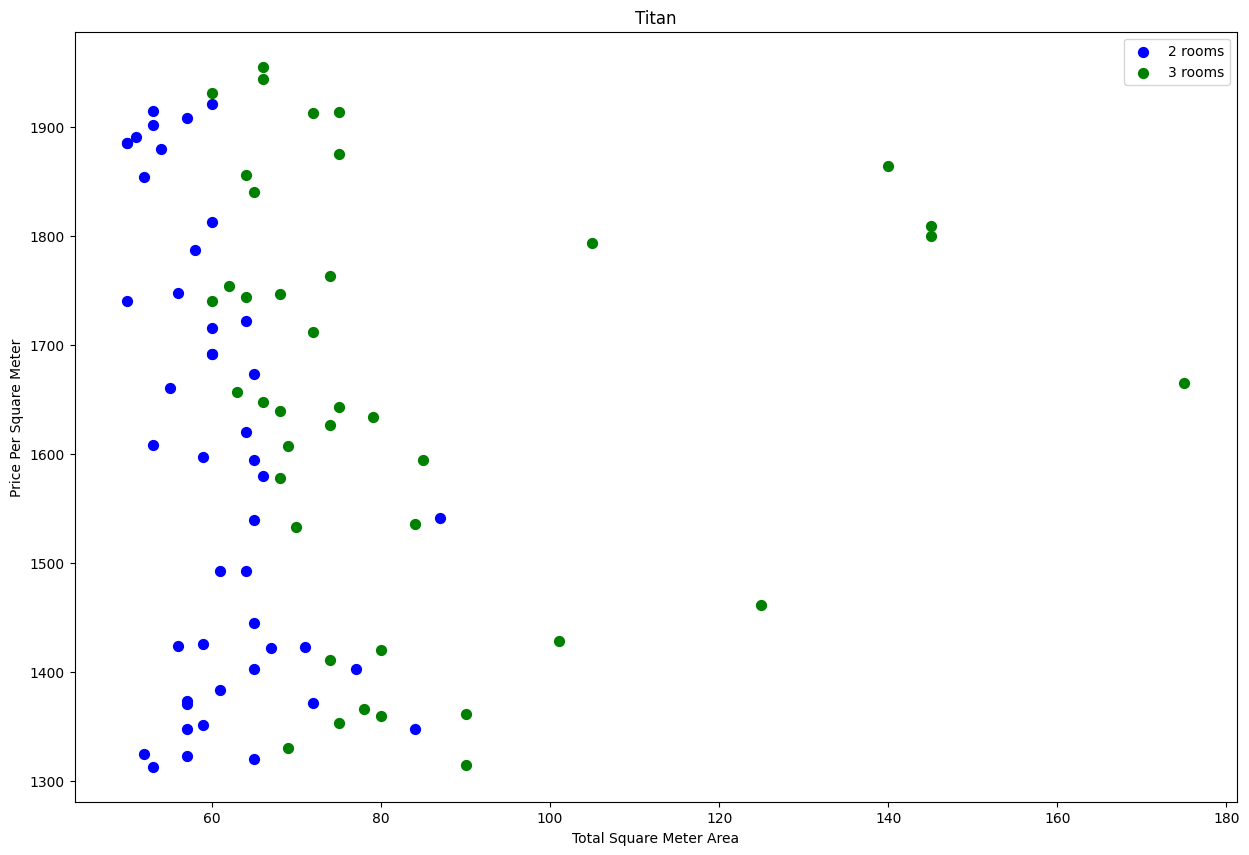

In [11]:
location = 'Titan'
plot_scatter_per_m2(df4, location)

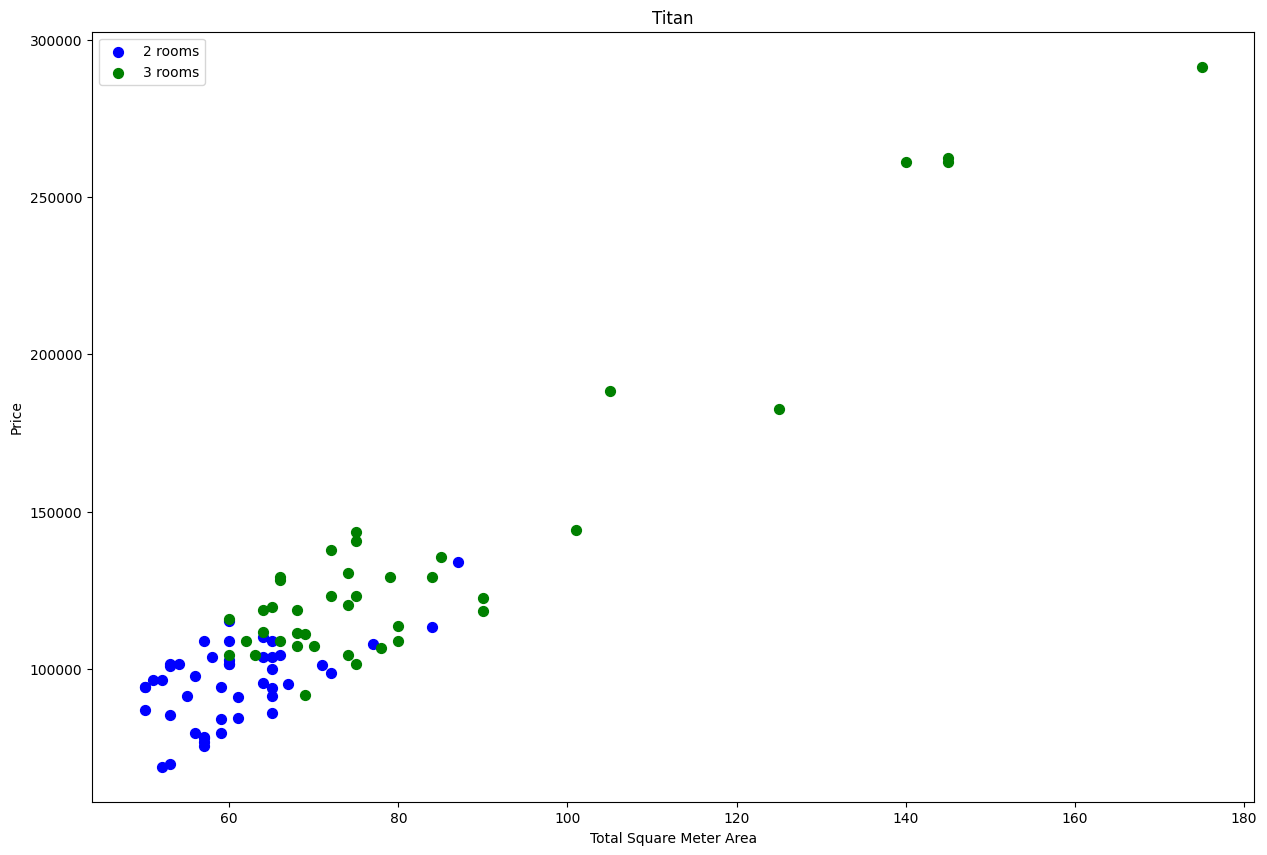

In [12]:
plot_scatter_per_price(df4, location)

In [13]:
def remove_room_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        rooms_stats = {}
        for rooms_count, rooms_df in location_df.groupby('rooms_count'):
            rooms_stats[rooms_count] = {
                'mean': np.mean(rooms_df.price_per_m2),
                'std': np.std(rooms_df.price_per_m2),
                'count': rooms_df.shape[0]
            }
        for rooms_count, rooms_df in location_df.groupby('rooms_count'):
            stats = rooms_stats.get(rooms_count - 1)
            if stats and stats['count'] > 5:
                exclude_indices = np.append(exclude_indices, rooms_df[rooms_df.price_per_m2 < (stats['mean'])].index.values)
    return df.drop(exclude_indices, axis='index')

df5 = remove_room_outliers(df4)
df5.shape

(3515, 9)

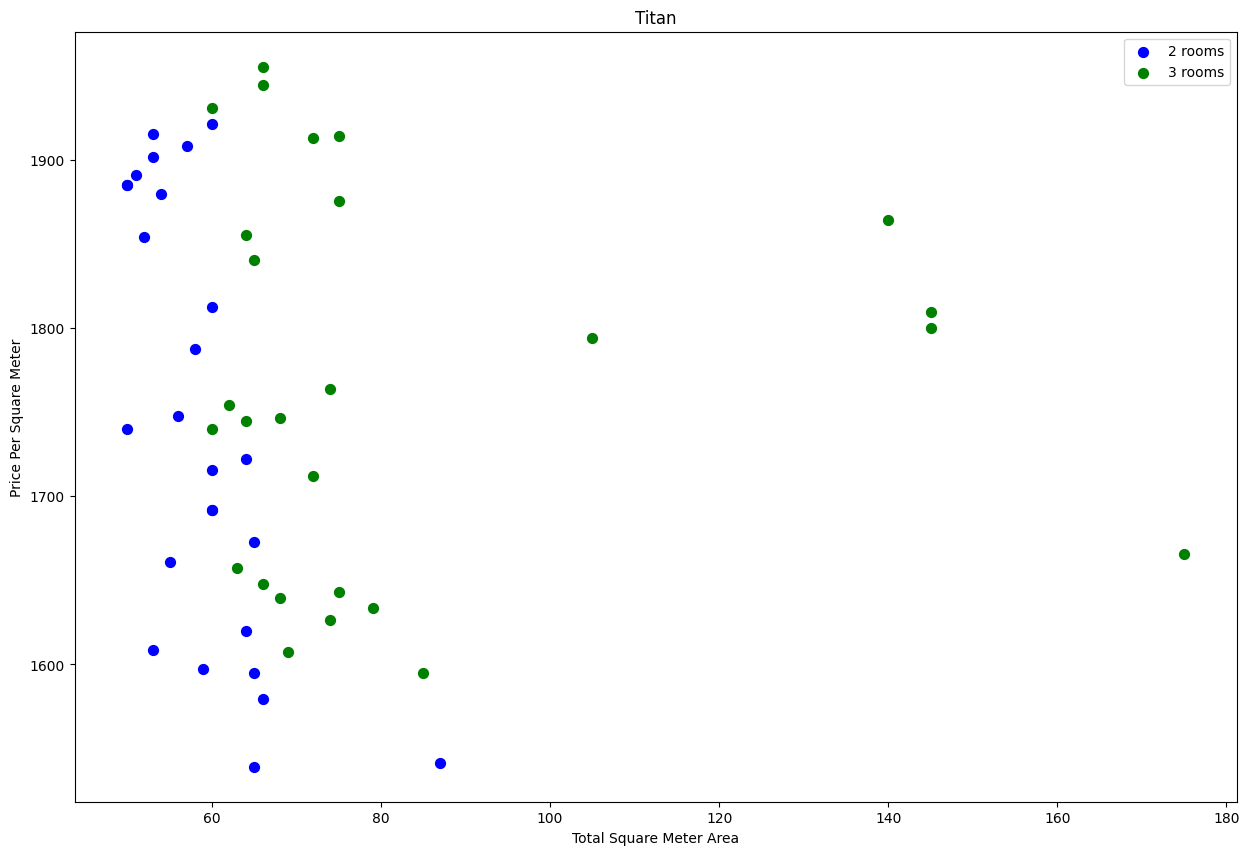

In [14]:
plot_scatter_per_m2(df5, location)

Text(0, 0.5, 'Count')

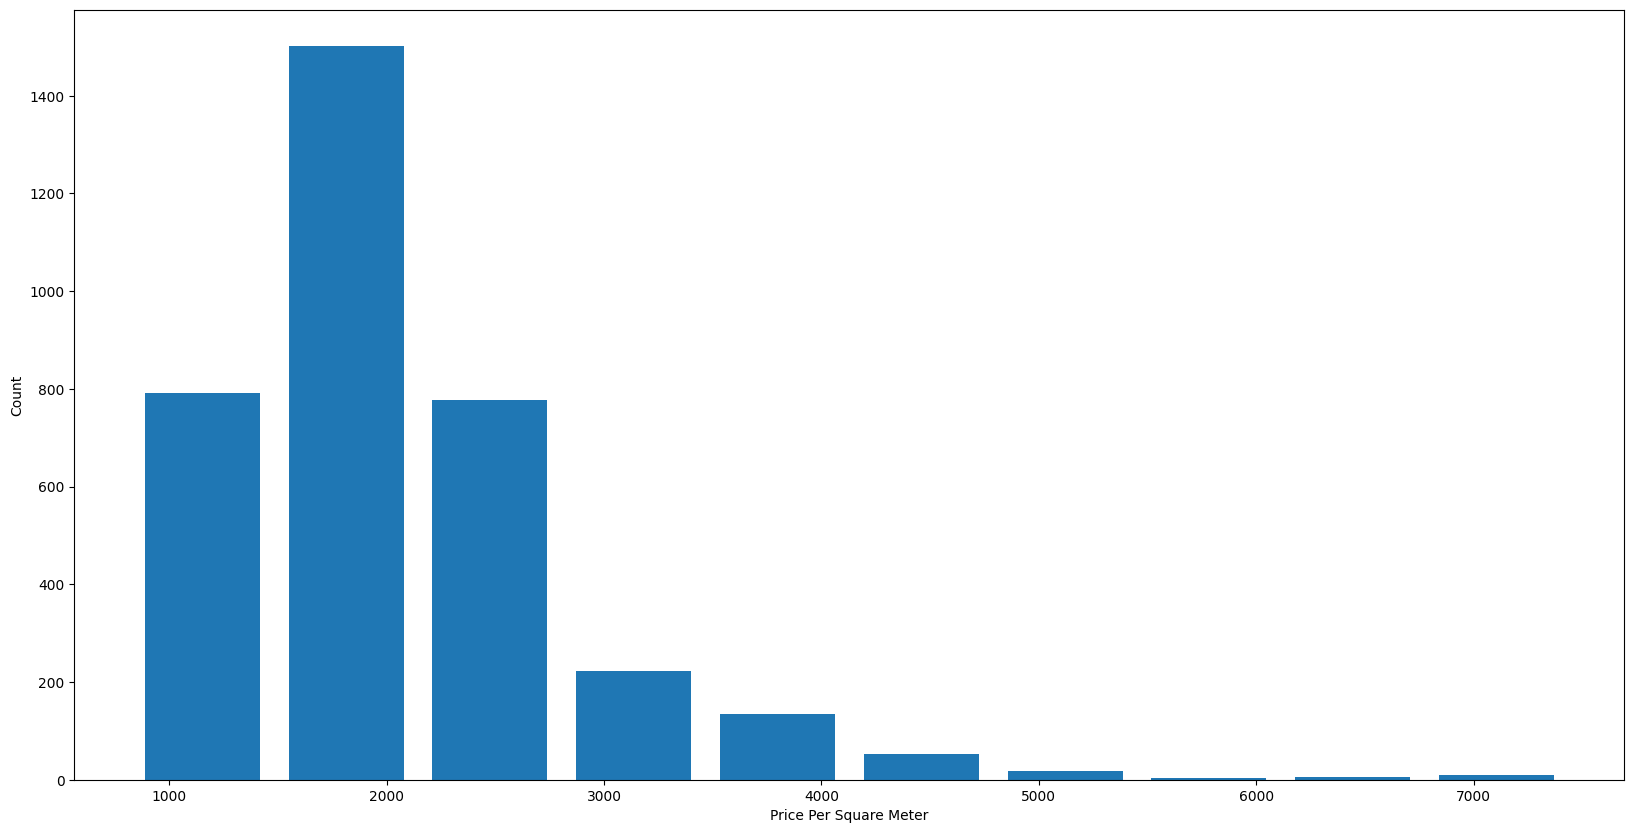

In [15]:
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20, 10)
plt.hist(df5.price_per_m2, rwidth = 0.8)
plt.xlabel("Price Per Square Meter")
plt.ylabel("Count")

In [16]:
df5.bathrooms_count.unique()

array([ 1.,  2., nan,  3.,  4.,  5.,  7.])

In [17]:
df5[df5.bathrooms_count > 4]

,location,price,rooms_count,built_surface,level,max_level,bathrooms_count,balconies_count,price_per_m2
1865,Dorobanti,797500.0,6.0,268.0,5,8.0,5.0,NaN,2975.746269
1879,Dorobanti,855500.0,6.0,268.0,5,7.0,5.0,NaN,3192.164179
2603,Herastrau,1783500.0,5.0,400.0,5,6.0,5.0,NaN,4458.750000
2622,Herastrau,1885000.0,7.0,580.0,5,6.0,5.0,NaN,3250.000000
2713,Herastrau,2175000.0,6.0,686.0,Ultimele 2 e,8.0,5.0,4.0,3170.553936
2816,Herastrau,978750.0,5.0,293.0,5,5.0,5.0,NaN,3340.443686
3950,P-ta Victoriei,2173550.0,7.0,573.0,7,7.0,7.0,3.0,3793.280977
4532,Romana,517650.0,8.0,260.0,1,1.0,5.0,1.0,1990.961538
5454,Vitan,942500.0,6.0,514.0,11,12.0,5.0,NaN,1833.657588


In [18]:
df6 = df5.drop(['max_level', 'price_per_m2'], axis='columns')
df6.head()

,location,price,rooms_count,built_surface,level,bathrooms_count,balconies_count
8,1 Decembrie 1918,79605.0,2.0,57.0,1,1.0,1.0
10,1 Decembrie 1918,114550.0,3.0,78.0,1,2.0,1.0
12,1 Decembrie 1918,85550.0,2.0,60.0,1,1.0,1.0
13,1 Decembrie 1918,87000.0,2.0,62.0,2,1.0,1.0
14,1 Decembrie 1918,99325.0,2.0,70.0,8,1.0,1.0


In [19]:
dummies = pd.get_dummies(df6.location)
dummies.head()

,1 Decembrie 1918,1 Mai,13 Septembrie,Alexandru Obregia,Aparatorii Patriei,Apusului,Arcul de Triumf,Armeneasca,Aviatiei,Aviatorilor,...,Ultracentral,Unirii,Universitate,Vacaresti,Vatra Luminoasa,Victoriei,Virtutii,Vitan,Vitan Mall,Vitan-Barzesti
8,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
10,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
12,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
13,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
14,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [20]:
df7 = pd.concat([df6, dummies.drop('Vitan-Barzesti', axis='columns')], axis='columns')
df7.location.unique()

array(['1 Decembrie 1918', '1 Mai', '13 Septembrie', 'Alexandru Obregia',
       'Aparatorii Patriei', 'Apusului', 'Arcul de Triumf', 'Armeneasca',
       'Aviatiei', 'Aviatorilor', 'Baba Novac', 'Baneasa', 'Banu Manta',
       'Barbu Vacarescu', 'Basarabia', 'Berceni', 'Brancoveanu',
       'Bucur Obor', 'Bucurestii Noi', 'Calea Calarasilor',
       'Calea Victoriei', 'Capitale', 'Central', 'Cismigiu', 'Colentina',
       'Cotroceni', 'Crangasi', 'Dacia', 'Damaroaia', 'Decebal',
       'Doamna Ghica', 'Domenii', 'Dorobanti', 'Dristor', 'Drumul Sarii',
       'Drumul Taberei', 'Eminescu', 'Eroii Revolutiei', 'Ferdinand',
       'Floreasca', 'Fundeni', 'Gara de Nord', 'Ghencea', 'Giulesti',
       'Giurgiului', 'Gorjului', 'Gradina Icoanei', 'Grivita',
       'Grozavesti', 'Herastrau', 'Iancu Nicolae', 'Iancului', 'Kiseleff',
       'Lacul Tei', 'Lujerului', 'Metalurgiei', 'Mihai Bravu', 'Militari',
       'Mosilor', 'Muncii', 'Nerva Traian', 'Nicolae Grigorescu', 'Nord',
       'Nordul

In [21]:
df8 = df7.drop(['location'], axis='columns')
df8.head()

,price,rooms_count,built_surface,level,bathrooms_count,balconies_count,1 Decembrie 1918,1 Mai,13 Septembrie,Alexandru Obregia,...,Turda,Ultracentral,Unirii,Universitate,Vacaresti,Vatra Luminoasa,Victoriei,Virtutii,Vitan,Vitan Mall
8,79605.0,2.0,57.0,1,1.0,1.0,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
10,114550.0,3.0,78.0,1,2.0,1.0,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
12,85550.0,2.0,60.0,1,1.0,1.0,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
13,87000.0,2.0,62.0,2,1.0,1.0,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
14,99325.0,2.0,70.0,8,1.0,1.0,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [22]:
df8[['rooms_count', 'balconies_count', 'bathrooms_count']] = df8[['rooms_count', 'balconies_count', 'bathrooms_count']].fillna(0)
df8['level'] = df8['level'].replace({'Parter': 0, 'Demisol': -1})
df8 = df8[~df8['level'].isin(['Ultimele 2 e', 'Mansarda'])]

In [23]:
X = df8.drop('price', axis='columns')
X.head()

,rooms_count,built_surface,level,bathrooms_count,balconies_count,1 Decembrie 1918,1 Mai,13 Septembrie,Alexandru Obregia,Aparatorii Patriei,...,Turda,Ultracentral,Unirii,Universitate,Vacaresti,Vatra Luminoasa,Victoriei,Virtutii,Vitan,Vitan Mall
8,2.0,57.0,1,1.0,1.0,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
10,3.0,78.0,1,2.0,1.0,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
12,2.0,60.0,1,1.0,1.0,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
13,2.0,62.0,2,1.0,1.0,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
14,2.0,70.0,8,1.0,1.0,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [24]:
y = df8.price
y.head()

8      79605.0
10    114550.0
12     85550.0
13     87000.0
14     99325.0
Name: price, dtype: float64

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X , y, test_size=0.2, random_state=10)

In [26]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train, y_train)
lr_clf.score(X_test, y_test)

0.8974619358244055

In [27]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)


array([0.89929824, 0.9090105 , 0.90635244, 0.89709122, 0.92511225])

In [28]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

import warnings
warnings.filterwarnings("ignore")

def find_best_model(X, y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1, 2],
                'selection' : ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion': ['mse', 'friedman_mse'],
                'splitter': ['best', 'random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X, y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })
    return pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])

find_best_model(X, y)

,model,best_score,best_params
0,linear_regression,0.907373,{}
1,lasso,0.907423,"{'alpha': 2, 'selection': 'random'}"
2,decision_tree,0.864103,"{'criterion': 'friedman_mse', 'splitter': 'best'}"


In [29]:
def predict_price(location, surface, rooms, baths, balcony, lvl):
    loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = rooms
    x[1] = surface
    x[2] = lvl
    x[3] = baths
    x[4] = balcony
    if loc_index >= 0:
        x[loc_index] = 1
        
    return lr_clf.predict([x])[0]

In [30]:
predict_price('Other', 65, 2, 1, 1, 5)

114029.3200457498

In [31]:
import pickle
with open('bucharest_apartments_prices_model.pickle', 'wb') as f:
    pickle.dump(lr_clf, f)

In [33]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json", "w") as f:
    f.write(json.dumps(columns))